In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(pd.read_csv('2D_ABCD29_15_45_65.csv'))[['T','x','y']]
df.head()

,T,x,y
0,0.36,6.947865,-2.457312
1,0.22,6.235643,-3.747043
2,0.19,6.548885,-3.950078
3,0.27,6.042789,-4.019490
4,0.24,7.099767,-2.429953


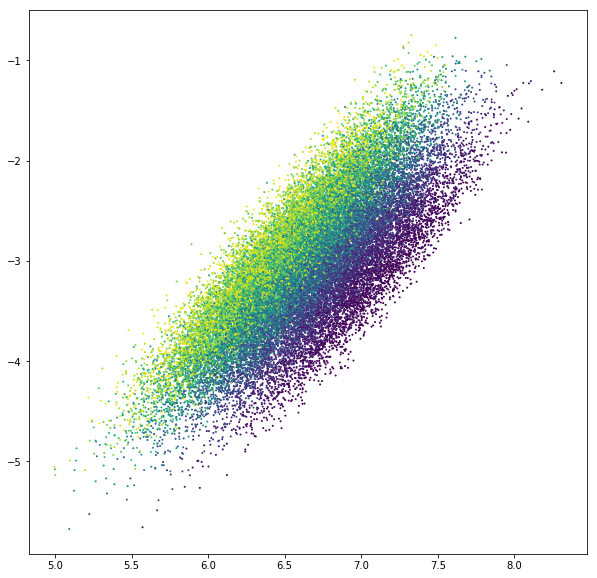

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(df.x,df.y,c=df['T'],s=1)

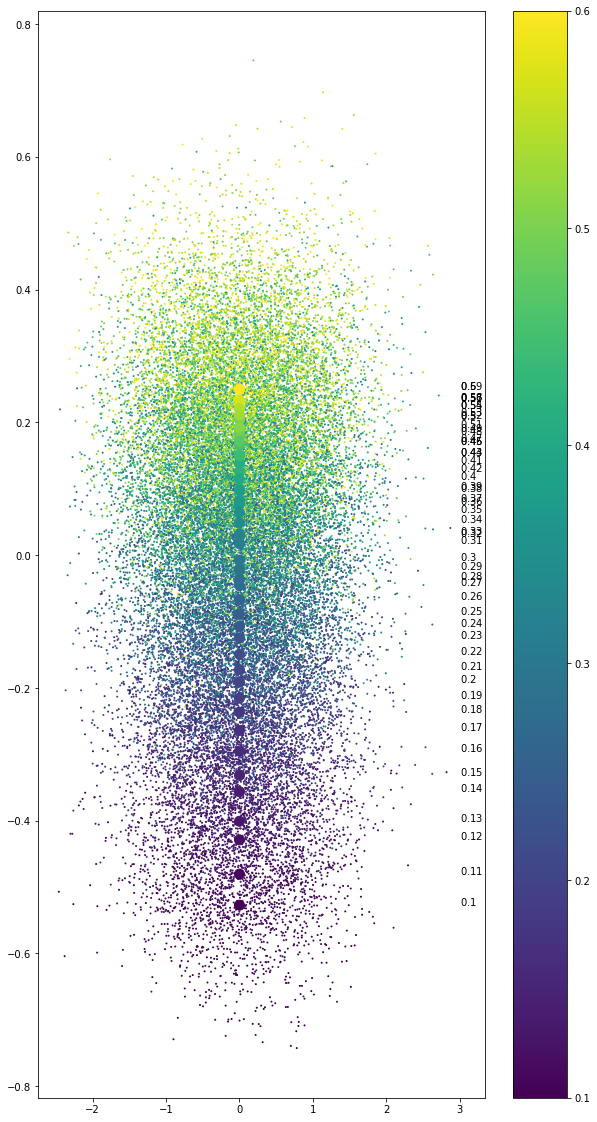

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.cm as cm

X = df[['x','y']].values

pca = PCA(n_components=2, random_state=42)
pca.fit(X)

newX = pca.transform(X)

newX = pd.DataFrame(newX)
newX.columns = ['x','y']

newX['T'] = df['T']

plt.figure(figsize=(10,20))
plt.scatter(newX['x'],newX['y'],c=newX['T'],s=1)
plt.colorbar()

norm = mpl.colors.Normalize(vmin=min(df['T']),vmax=max(df['T']))
cmap0 = cm.viridis
m0 = cm.ScalarMappable(norm=norm, cmap=cmap0)

# plt.show()
# plt.figure(figsize=(5,20))

for T in newX['T'].unique():
    tempDF = newX[newX['T'] == T]
    meanY = tempDF['y'].mean()
    stdY = tempDF['y'].std()
    stdY = round(stdY, 2)
    plt.scatter([0],meanY, c=m0.to_rgba(tempDF['T']),s=100)
#     plt.scatter(meanX,0, c=m0.to_rgba(tempDF['T']))

    plt.text(3,meanY, r'${}$'.format(T))

plt.show()